In [1]:
import pandas as pd
import numpy as np
from colored import Fore, Back, Style
import time

In [2]:
pip install colored

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 13.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
# take filename input
def fetch_the_data():
    while True:
        try:
            print(f"\n\n{Fore.blue}Enter the name of the file to perform selection{Style.reset}")
            # CS205_large_Data__10.txt
            # CS205_small_Data__31.txt
            filename = input()
            df=pd.read_csv(filename,sep=r'\s+',header=None)
            return df
        except:
            print(f"{Fore.red}Invalid file name. Try again{Style.reset}")
        
        

In [4]:
algorithms = {1:"Forward Selection",2:"Backward Elimination"}

In [5]:
def get_algorithm_choice():
    while True:
        print(f"\n\n{Fore.blue}Enter the algorithm you want to run:(1 or 2){Style.reset}")
        print(f"{Fore.green}{Style.BOLD}1. Forward Selection \n2. Backward Elimination{Style.reset}")
        choice = int(input())
        if choice in [1,2]:
            return algorithms[choice]
        print(f"{Fore.red}Invalid choice. Please enter 1 or 2{Style.reset}")
    

In [6]:
def predict_class_label_using_knn(x_train,y_train,x_test):
    # get distances between x_test and all rows of x_train
    distances = np.linalg.norm(x_train - x_test, axis=1)
    # print('distances:',distances)
    min_distance_index = np.argmin(distances)
    # print('min_distance_index:',min_distance_index)
    return y_train[min_distance_index]
    

In [7]:
# ref: https://numpy.org/doc/stable/reference/generated/numpy.hstack.html
# ref: https://numpy.org/doc/stable/reference/generated/numpy.vstack.html

def get_accuracy(X,Y):
    # print("shape==>",X.shape)
    n_rows = X.shape[0]
    y_pred = []
    # here we follow leaving-one-out evaluation
    for i in range(n_rows):
        
        # create new x_train, y_train leaving the i'th row
        x_train = np.vstack([X[:i], X[i+1:]])
        y_train = np.hstack([Y[:i], Y[i+1:]])
        
        # create new x_test having i'th row
        if isinstance(X, np.ndarray):
            x_test = X[i]
        else:
            x_test = X.to_numpy()[i]

        predicted_value = predict_class_label_using_knn(x_train,y_train,x_test)
        y_pred.append(predicted_value)

    # we have Y and y_pred, so calculate accuracy
    accuracy = np.mean(np.array(Y) == np.array(y_pred))
    return accuracy
        
        

In [8]:
def forward_selection(X,Y,feature_names):
    data = []
    
    start_time = time.time()
    
    if not isinstance(X, np.ndarray):
        X = X.to_numpy()
    result_features = []
    result_accuracy = 0
    selected_features = []
    unselected_features = feature_names[:]
    print(f"{Fore.red}{Style.BOLD}Beginning search!!!{Style.reset}")
    while unselected_features:
        print()
        current_best_features = []
        current_best_accuracy = 0
        for feature in unselected_features:
            # print("feature==>",feature)
            current_features = selected_features + [feature]
            # print("current_features:",current_features)
            
            accuracy = get_accuracy(X[:,current_features],Y)
            
            print_current_features = list(map(lambda x: x + 1, current_features))
            print(f"Using feature(s){Style.reset}",end = "")
            print(f"{Fore.blue} {Style.BOLD}{print_current_features}{Style.reset}", end = "")
            print(f", Accuracy = {Style.reset}",end = "")
            print(f"\033[95m {Style.BOLD}{accuracy*100:.2f}%{Style.reset}")

            if accuracy>current_best_accuracy:
                current_best_accuracy = accuracy
                current_best_features = current_features
          
        if current_best_accuracy>result_accuracy:
            result_accuracy = current_best_accuracy
            result_features = current_best_features 
        else:
            print(f"\n{Fore.red}Warning!! Accuracy has decreased, we are proceeding search in case of local maxima{Style.reset}")
            
        selected_features = current_best_features
        unselected_features = list(filter(lambda x: x not in selected_features, unselected_features))

        data.append({"features":current_best_features, "accuracy":current_best_accuracy*100})

        print_current_best_features = list(map(lambda x: x + 1, current_best_features))
        print(f"\nFeature set{Style.reset}",end = "")
        print(f"{Fore.blue} {Style.BOLD}{print_current_best_features}{Style.reset}", end = " ")
        print(f"was best, Accuracy = {Style.reset}",end = "")
        print(f"\033[95m {Style.BOLD}{current_best_accuracy*100:.2f}%{Style.reset}")
        
    print(f"\n{Fore.red}{Style.BOLD}Search Finished!!!{Style.reset}")

    print_result_features = list(map(lambda x: x + 1, result_features))
    print(f"\nThe best feature(s) are{Style.reset}",end = " ")
    print(f"{Fore.blue}{Style.BOLD}{print_result_features}{Style.reset}", end = "")
    print(f", Accuracy = {Style.reset}",end = "")
    print(f"\033[95m {Style.BOLD}{result_accuracy*100:.2f}%{Style.reset}")
    
    end_time = time.time()
    time_taken = end_time-start_time
    print(f"{Fore.blue}{Style.BOLD}\nTime taken: {time_taken:.2f} seconds{Style.reset}")

    return data

In [9]:
def backward_elimination(X,Y,feature_names):
    data = []
    
    start_time = time.time()
    
    if not isinstance(X, np.ndarray):
        X = X.to_numpy()
    result_features = []
    result_accuracy = 0
    selected_features = feature_names[:]
    unselected_features = []
    print(f"{Fore.red}{Style.BOLD}Beginning search!!!{Style.reset}")
    while len(selected_features) >= 2:
        print()
        current_best_features = []
        current_best_accuracy = 0
        for feature in selected_features:
            # print("feature==>",feature)
            current_features = list(filter(lambda x: x!=feature,selected_features))
            # print("current_features:",current_features)
            
            accuracy = get_accuracy(X[:,current_features],Y)
            
            print_current_features = list(map(lambda x: x + 1, current_features))
            # print(f"Using features {print_current_features}, Accuracy = {accuracy}")
            print(f"Using feature(s){Style.reset}",end = "")
            print(f"{Fore.blue} {Style.BOLD}{print_current_features}{Style.reset}", end = "")
            print(f", Accuracy = {Style.reset}",end = "")
            print(f"\033[95m {Style.BOLD}{accuracy*100:.2f}%{Style.reset}")

            if accuracy>current_best_accuracy:
                current_best_accuracy = accuracy
                current_best_features = current_features
          
        if current_best_accuracy>result_accuracy:
            result_accuracy = current_best_accuracy
            result_features = current_best_features 
        else:
             print(f"\n{Fore.red}Warning!! Accuracy has decreased, we are proceeding search in case of local maxima{Style.reset}")
            
        selected_features = current_best_features
        unselected_features = list(filter(lambda x: x not in selected_features, unselected_features))

        data.append({"features":current_best_features, "accuracy":current_best_accuracy*100})

        print_current_best_features = list(map(lambda x: x + 1, current_best_features))
        # print(f"\nFeature set{print_current_best_features} was best, Accuracy = {current_best_accuracy}")
        print(f"\nFeature set{Style.reset}",end = "")
        print(f"{Fore.blue} {Style.BOLD}{print_current_best_features}{Style.reset}", end = " ")
        print(f"was best, Accuracy = {Style.reset}",end = "")
        print(f"\033[95m {Style.BOLD}{current_best_accuracy*100:.2f}%{Style.reset}")
        
    print("\nSearch Finished!!!")

    print_result_features = list(map(lambda x: x + 1, result_features))
    # print(f"\nThe best features are {print_result_features}, Accuracy = {result_accuracy}")
    print(f"\nThe best feature(s) are{Style.reset}",end = " ")
    print(f"{Fore.blue}{Style.BOLD}{print_result_features}{Style.reset}", end = "")
    print(f", Accuracy = {Style.reset}",end = "")
    print(f"\033[95m {Style.BOLD}{result_accuracy*100:.2f}%{Style.reset}")
    
    end_time = time.time()
    time_taken = end_time-start_time
    print(f"{Fore.blue}{Style.BOLD}\nTime taken: {time_taken:.2f} seconds{Style.reset}")

    return data

In [10]:
print(f"{Style.BOLD} {Fore.green}Welcome to Yuktha's feature selection algorithm{Style.reset}")

# taking filename input
df = fetch_the_data()

# taking algorithm input
algorithm_chosen = get_algorithm_choice()
print("The algorithm chosen is: ",algorithm_chosen)

# In the given data class label is in the first column, rest are feature columns
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]
feature_names = X.columns.to_list()
feature_names = list(map(lambda x: x - 1, feature_names))
# print(feature_names)
# print the data statistics
print("The given data has ",X.shape[1]," features and ",X.shape[0]," instances/rows" )

print(f"Running Nearest Neighbor Algorithm on all {X.shape[1]} features")
print(f"Accuracy: {get_accuracy(X,Y)*100}")

print(f"Running {algorithm_chosen} on the given dataset..")
if algorithm_chosen ==algorithms[1]:
    forward_selection(X,Y,feature_names)
else:
    backward_elimination(X,Y,feature_names)

 Welcome to Yuktha's feature selection algorithm


Enter the name of the file to perform selection


 CS205_small_Data__31.txt




Enter the algorithm you want to run:(1 or 2)
1. Forward Selection 
2. Backward Elimination


 1


The algorithm chosen is:  Forward Selection
The given data has  12  features and  500  instances/rows
Running Nearest Neighbor Algorithm on all 12 features
Accuracy: 70.8
Running Forward Selection on the given dataset..
Beginning search!!!

Using feature(s) [1], Accuracy =  71.20%
Using feature(s) [2], Accuracy =  70.40%
Using feature(s) [3], Accuracy =  84.40%
Using feature(s) [4], Accuracy =  73.00%
Using feature(s) [5], Accuracy =  67.00%
Using feature(s) [6], Accuracy =  69.80%
Using feature(s) [7], Accuracy =  71.60%
Using feature(s) [8], Accuracy =  65.40%
Using feature(s) [9], Accuracy =  69.20%
Using feature(s) [10], Accuracy =  68.80%
Using feature(s) [11], Accuracy =  70.40%
Using feature(s) [12], Accuracy =  69.00%

Feature set [3] was best, Accuracy =  84.40%

Using feature(s) [3, 1], Accuracy =  86.60%
Using feature(s) [3, 2], Accuracy =  85.00%
Using feature(s) [3, 4], Accuracy =  97.20%
Using feature(s) [3, 5], Accuracy =  82.40%
Using feature(s) [3, 6], Accuracy =  85.2

# Running for small dataset

In [62]:
filename = "CS205_small_Data__31.txt"
df=pd.read_csv(filename,sep=r'\s+',header=None)
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]
feature_names = X.columns.to_list()
feature_names = list(map(lambda x: x - 1, feature_names))

## Forward selection

In [12]:
small_fs = forward_selection(X,Y,feature_names)

Beginning search!!!

Using feature(s) [1], Accuracy =  71.20%
Using feature(s) [2], Accuracy =  70.40%
Using feature(s) [3], Accuracy =  84.40%
Using feature(s) [4], Accuracy =  73.00%
Using feature(s) [5], Accuracy =  67.00%
Using feature(s) [6], Accuracy =  69.80%
Using feature(s) [7], Accuracy =  71.60%
Using feature(s) [8], Accuracy =  65.40%
Using feature(s) [9], Accuracy =  69.20%
Using feature(s) [10], Accuracy =  68.80%
Using feature(s) [11], Accuracy =  70.40%
Using feature(s) [12], Accuracy =  69.00%

Feature set [3] was best, Accuracy =  84.40%

Using feature(s) [3, 1], Accuracy =  86.60%
Using feature(s) [3, 2], Accuracy =  85.00%
Using feature(s) [3, 4], Accuracy =  97.20%
Using feature(s) [3, 5], Accuracy =  82.40%
Using feature(s) [3, 6], Accuracy =  85.20%
Using feature(s) [3, 7], Accuracy =  86.00%
Using feature(s) [3, 8], Accuracy =  84.20%
Using feature(s) [3, 9], Accuracy =  82.80%
Using feature(s) [3, 10], Accuracy =  83.60%
Using feature(s) [3, 11], Accuracy =  85

## Backward Elimination

In [69]:
small_bw = backward_elimination(X,Y,feature_names)

Beginning search!!!

Using feature(s) [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], Accuracy =  71.20%
Using feature(s) [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], Accuracy =  72.80%
Using feature(s) [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12], Accuracy =  69.40%
Using feature(s) [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12], Accuracy =  70.80%
Using feature(s) [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12], Accuracy =  73.00%
Using feature(s) [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12], Accuracy =  70.20%
Using feature(s) [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12], Accuracy =  75.80%
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12], Accuracy =  74.20%
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12], Accuracy =  72.20%
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12], Accuracy =  74.40%
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12], Accuracy =  74.40%
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], Accuracy =  72.00%

Feature set [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12] was best, Accuracy =  75.80%

Using feature(

In [70]:
all_features = {
    "features":feature_names,
    "accuracy": get_accuracy(X,Y)*100
}
small_bw = [all_features] + small_bw

# Running for large dataset

In [72]:
filename = "CS205_large_Data__10.txt"
df=pd.read_csv(filename,sep=r'\s+',header=None)
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]
feature_names = X.columns.to_list()
feature_names = list(map(lambda x: x - 1, feature_names))

## Forward selection

In [15]:
large_fs = forward_selection(X,Y,feature_names)

Beginning search!!!

Using feature(s) [1], Accuracy =  69.38%
Using feature(s) [2], Accuracy =  69.58%
Using feature(s) [3], Accuracy =  68.24%
Using feature(s) [4], Accuracy =  69.88%
Using feature(s) [5], Accuracy =  69.32%
Using feature(s) [6], Accuracy =  69.90%
Using feature(s) [7], Accuracy =  69.26%
Using feature(s) [8], Accuracy =  69.08%
Using feature(s) [9], Accuracy =  69.78%
Using feature(s) [10], Accuracy =  69.84%
Using feature(s) [11], Accuracy =  69.78%
Using feature(s) [12], Accuracy =  68.74%
Using feature(s) [13], Accuracy =  69.78%
Using feature(s) [14], Accuracy =  69.10%
Using feature(s) [15], Accuracy =  69.40%
Using feature(s) [16], Accuracy =  69.52%
Using feature(s) [17], Accuracy =  70.26%
Using feature(s) [18], Accuracy =  68.52%
Using feature(s) [19], Accuracy =  70.60%
Using feature(s) [20], Accuracy =  70.50%
Using feature(s) [21], Accuracy =  68.46%
Using feature(s) [22], Accuracy =  68.56%
Using feature(s) [23], Accuracy =  70.38%
Using feature(s) [24],

## Backward Elimination

In [16]:
large_bw = backward_elimination(X,Y,feature_names)

Beginning search!!!

Using feature(s) [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], Accuracy =  67.86%
Using feature(s) [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], Accuracy =  68.10%
Using feature(s) [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], Accuracy =  67.66%
Using feature(s) [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], Accuracy =  67.84%
Using feature(s) [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1

In [74]:
all_features = {
    "features":feature_names,
    "accuracy": get_accuracy(X,Y)*100
}
large_bw = [all_features] + large_bw

# Plot Graph

## Bar plot

In [76]:
import matplotlib.pyplot as plt
def plot_the_graph(data):
    data_pandas = pd.DataFrame(data)
    data_pandas['features'] = data_pandas['features'].apply(lambda x: ', '.join(map(str, [i + 1 for i in x])))
    plt.figure(figsize=(14, 8))
    plt.bar(data_pandas['features'], data_pandas['accuracy'])
    plt.xlabel('Feature Set')
    plt.ylabel('Accuracy')
    plt.title('Accuracies of Different Feature Sets')
    plt.xticks(rotation=90)  # Rotate feature set labels for better readability
    plt.tight_layout()
    plt.show()

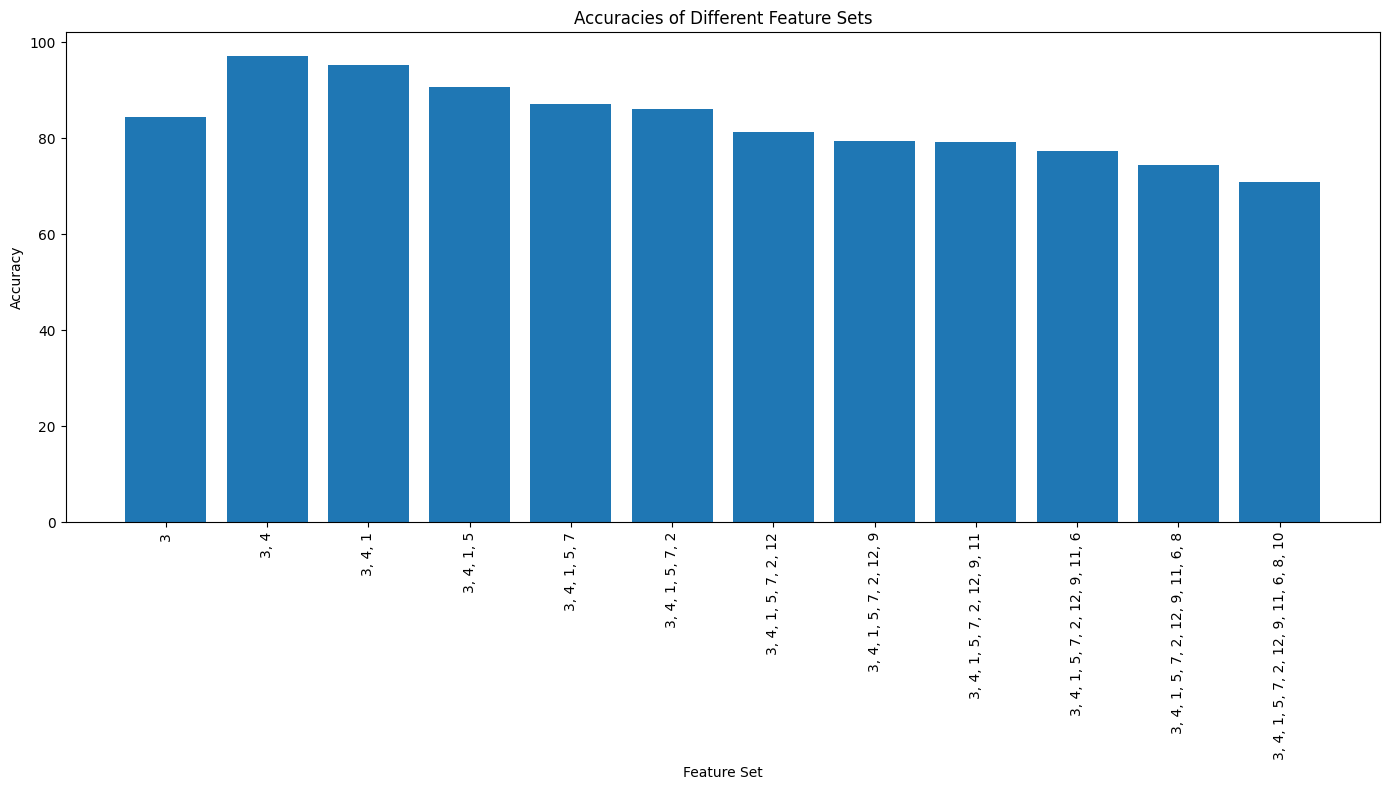

In [77]:
plot_the_graph(small_fs)

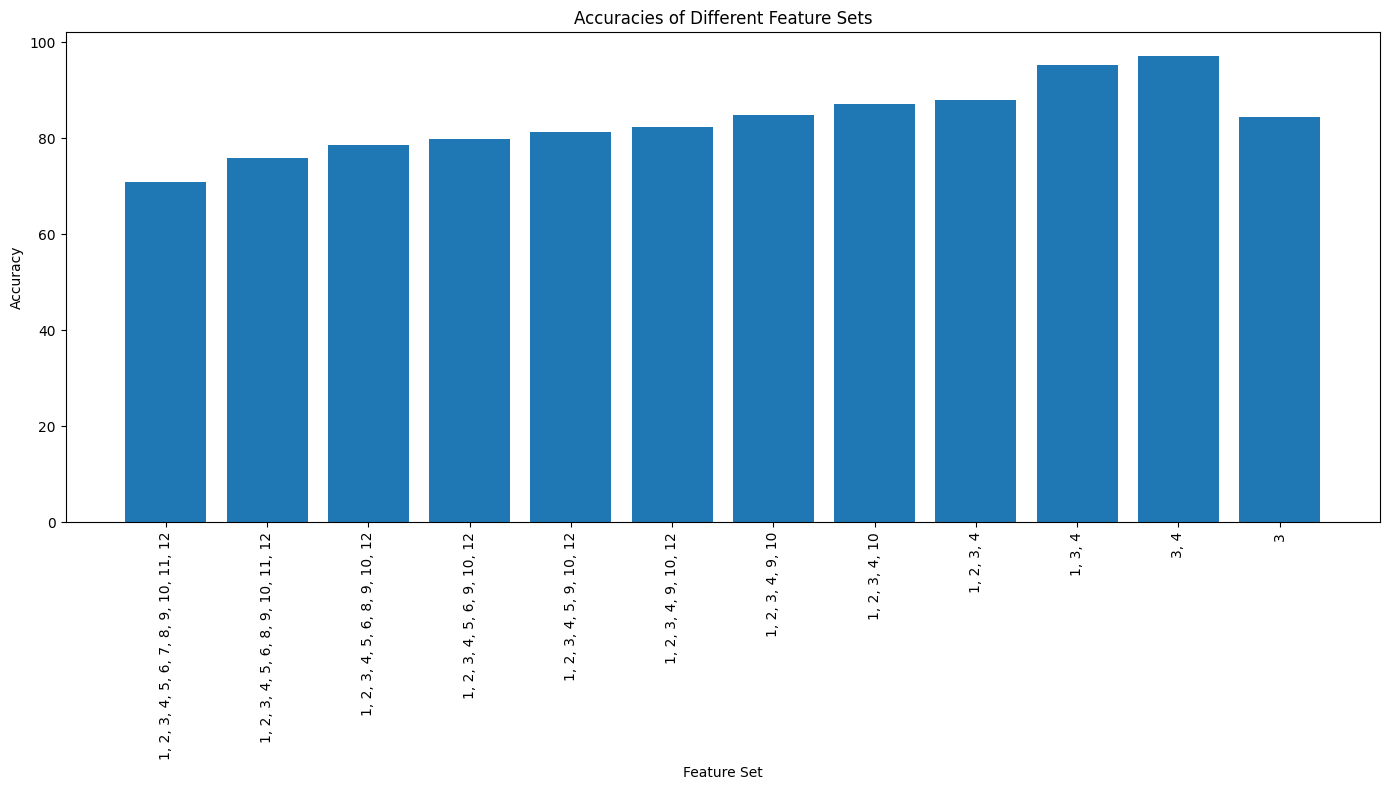

In [78]:
plot_the_graph(small_bw)

/var/folders/6d/63b6nx1j66s0czb06fz5fkq40000gn/T/ipykernel_61004/1619363393.py:11: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



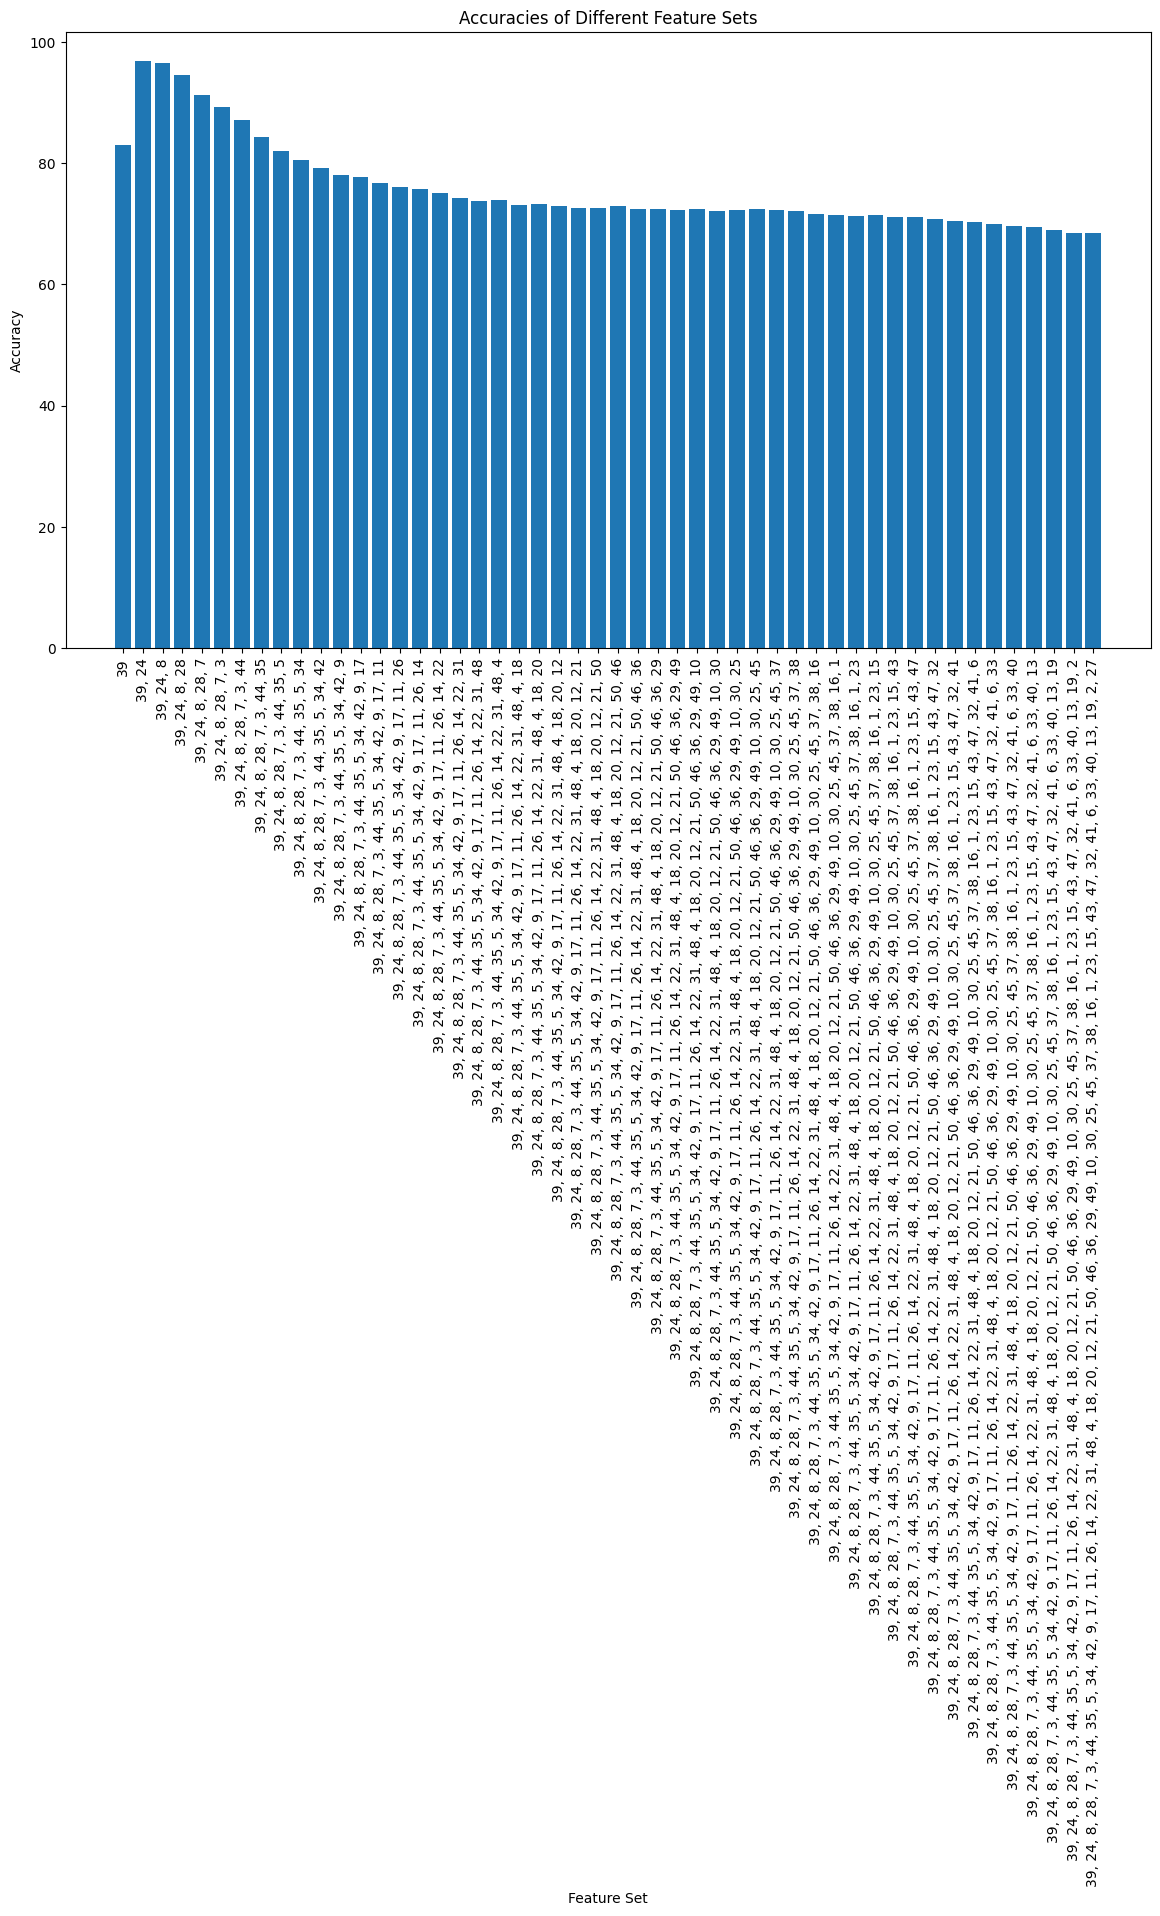

In [79]:
plot_the_graph(large_fs)

/var/folders/6d/63b6nx1j66s0czb06fz5fkq40000gn/T/ipykernel_61004/1619363393.py:11: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



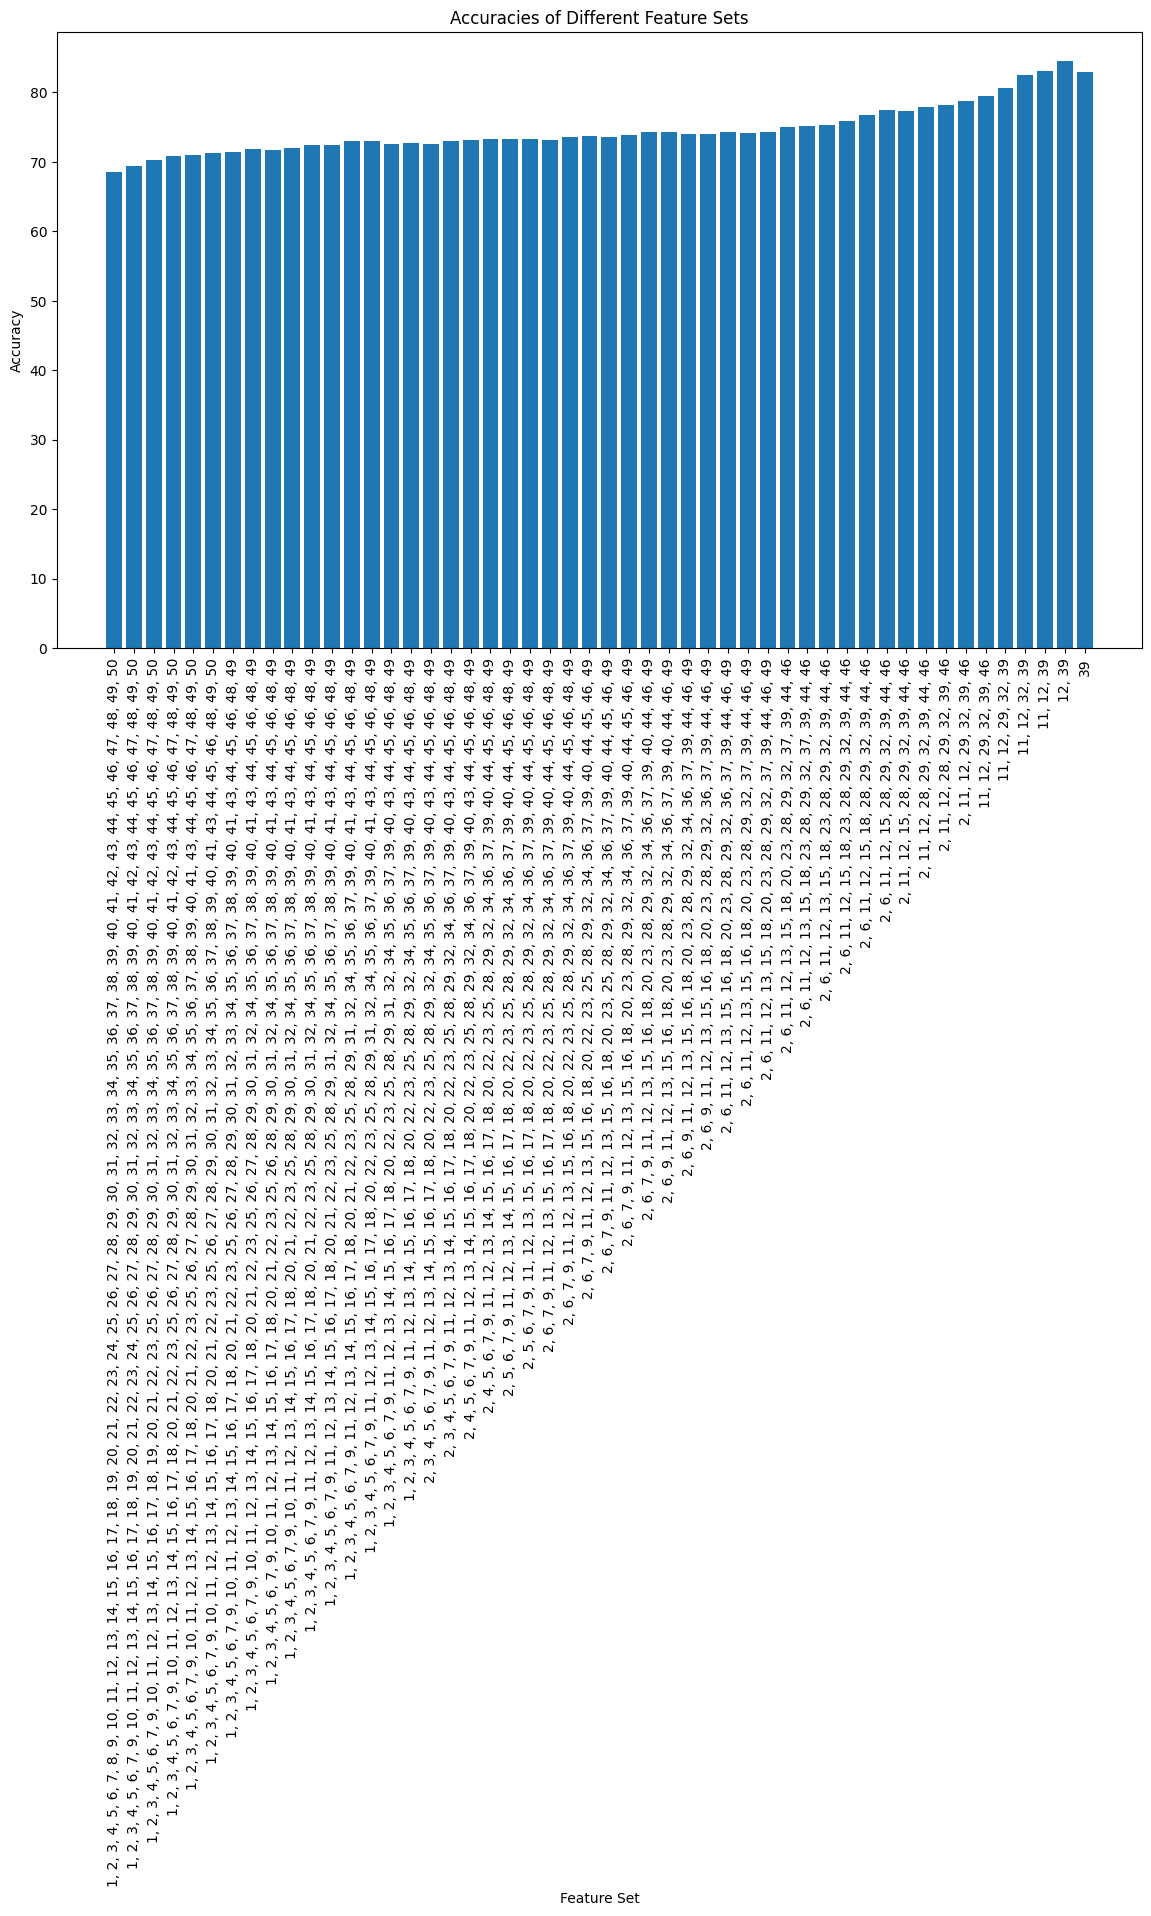

In [80]:
plot_the_graph(large_bw)

## horizontal bar plot

In [25]:
def plot_the_graph_horizontal(data):
    data_pandas = pd.DataFrame(data)
    data_pandas['features'] = data_pandas['features'].apply(lambda x: ', '.join(map(str, [i + 1 for i in x])))
    plt.figure(figsize=(14, 8))
    plt.barh(data_pandas['features'], data_pandas['accuracy'])
    plt.xlabel('Feature Set')
    plt.ylabel('Accuracy')
    plt.title('Accuracies of Different Feature Sets')
    plt.xticks(rotation=90)  # Rotate feature set labels for better readability
    plt.tight_layout()
    plt.show()

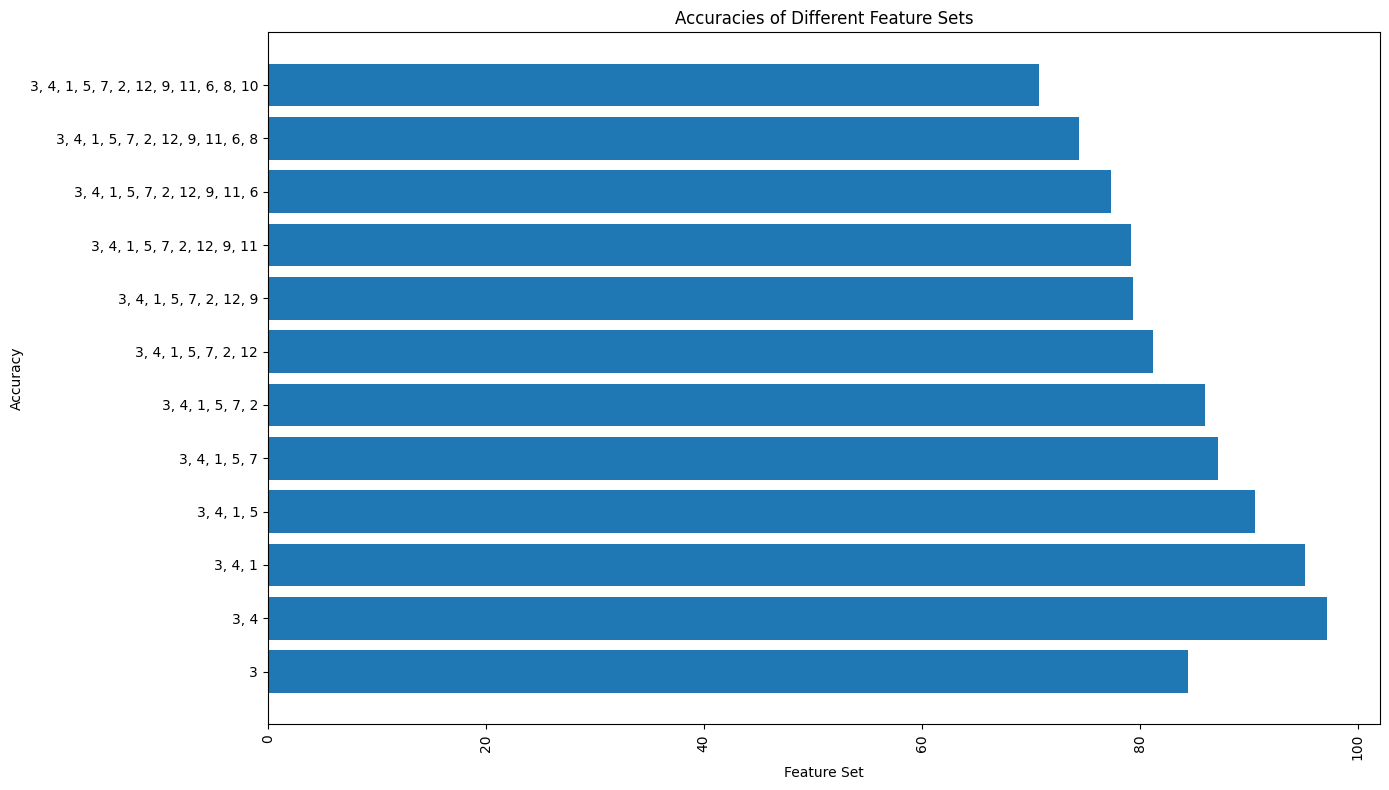

In [26]:
plot_the_graph_horizontal(small_fs)

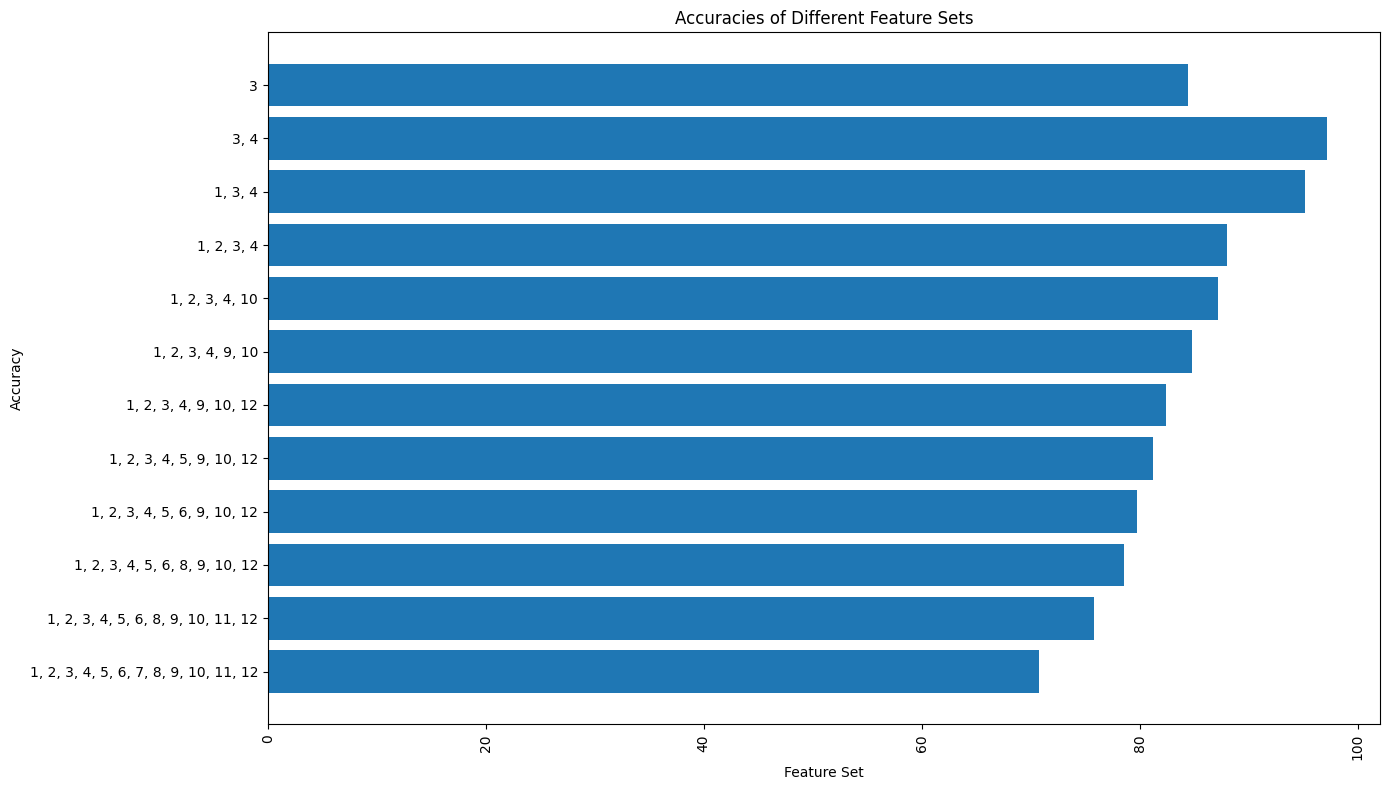

In [81]:
plot_the_graph_horizontal(small_bw)

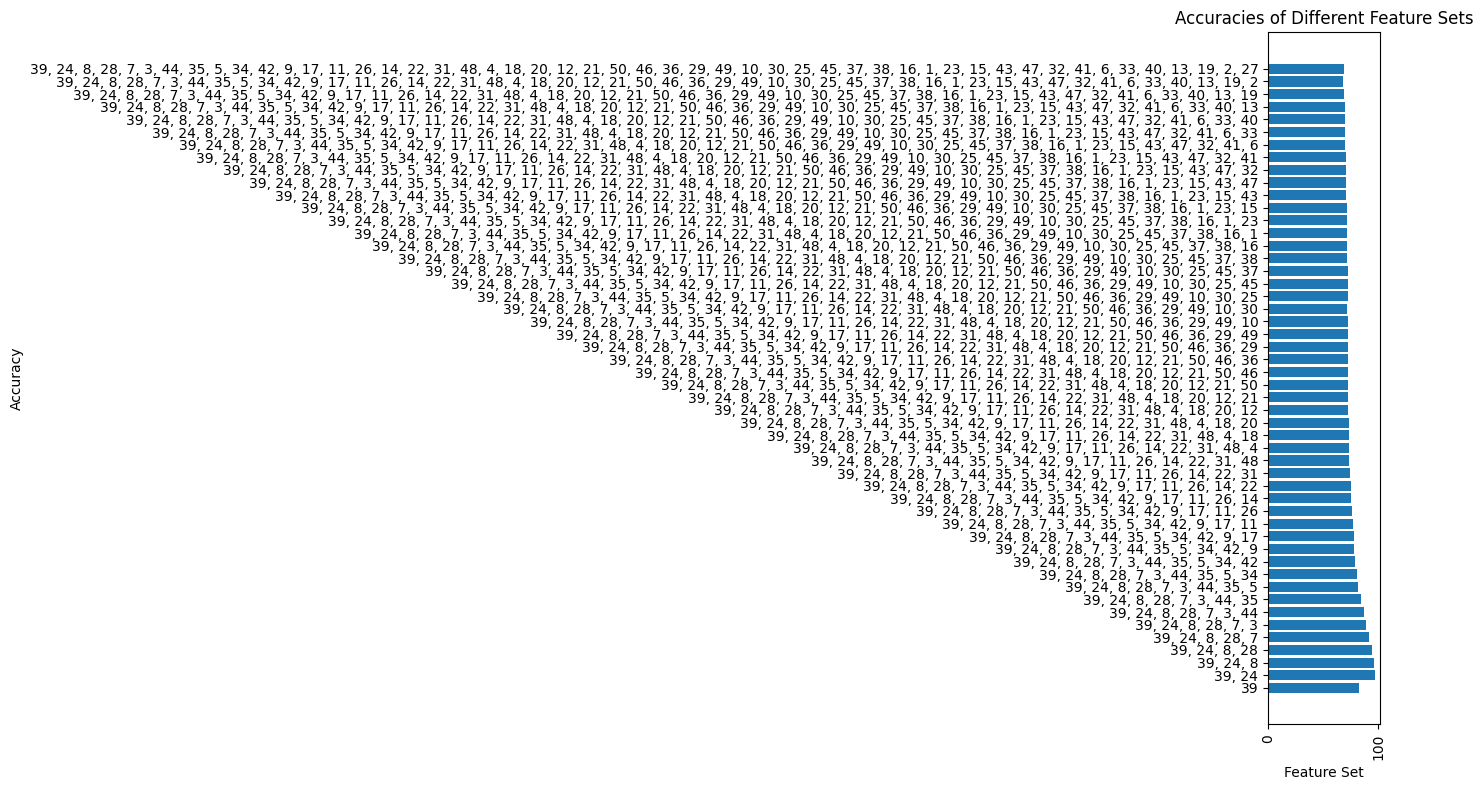

In [28]:
plot_the_graph_horizontal(large_fs)

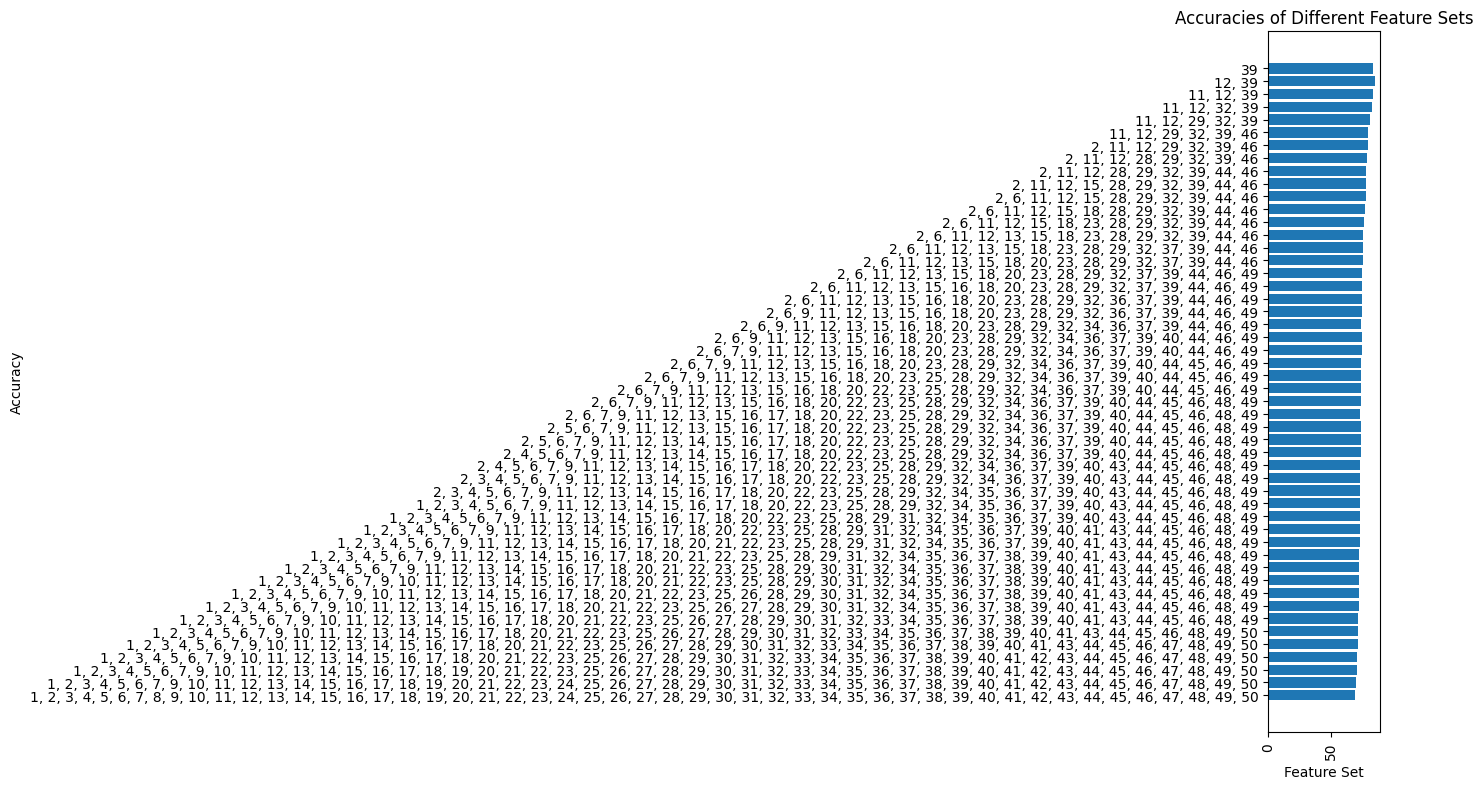

In [82]:
plot_the_graph_horizontal(large_bw)

## Plot with feature lengths

In [87]:
def plot_the_graph_with_feature_lengths(data):
    data_pandas = pd.DataFrame(data)
    data_pandas['features'] = data_pandas['features'].apply(len)
    plt.figure(figsize=(14, 8))
    plt.bar(data_pandas['features'], data_pandas['accuracy'])
    plt.xlabel('Number of features')
    plt.ylabel('Accuracy')
    plt.title('Accuracies of Different Feature Sets Lengths')
    plt.xticks(rotation=90)  # Rotate feature set labels for better readability
    plt.tight_layout()
    plt.show()

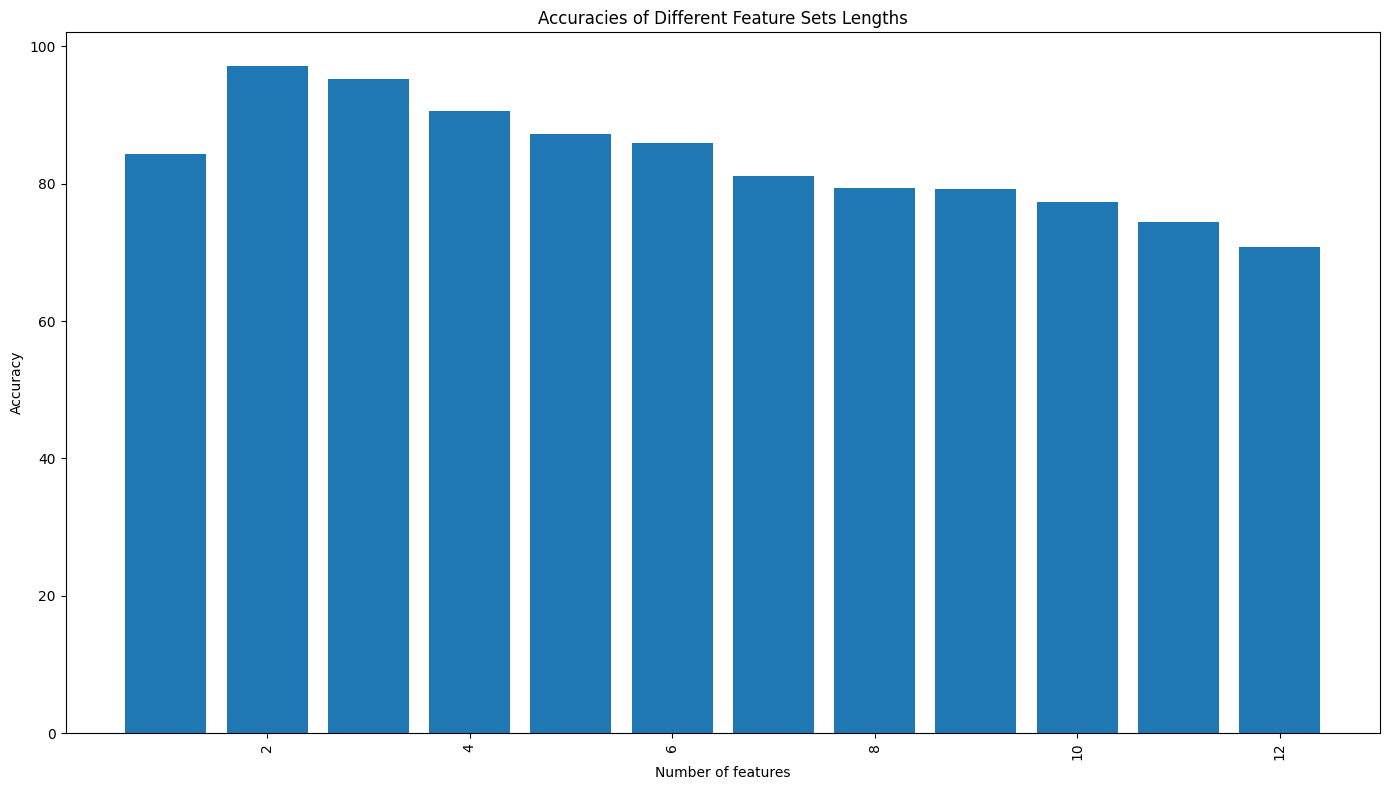

In [88]:
plot_the_graph_with_feature_lengths(small_fs)

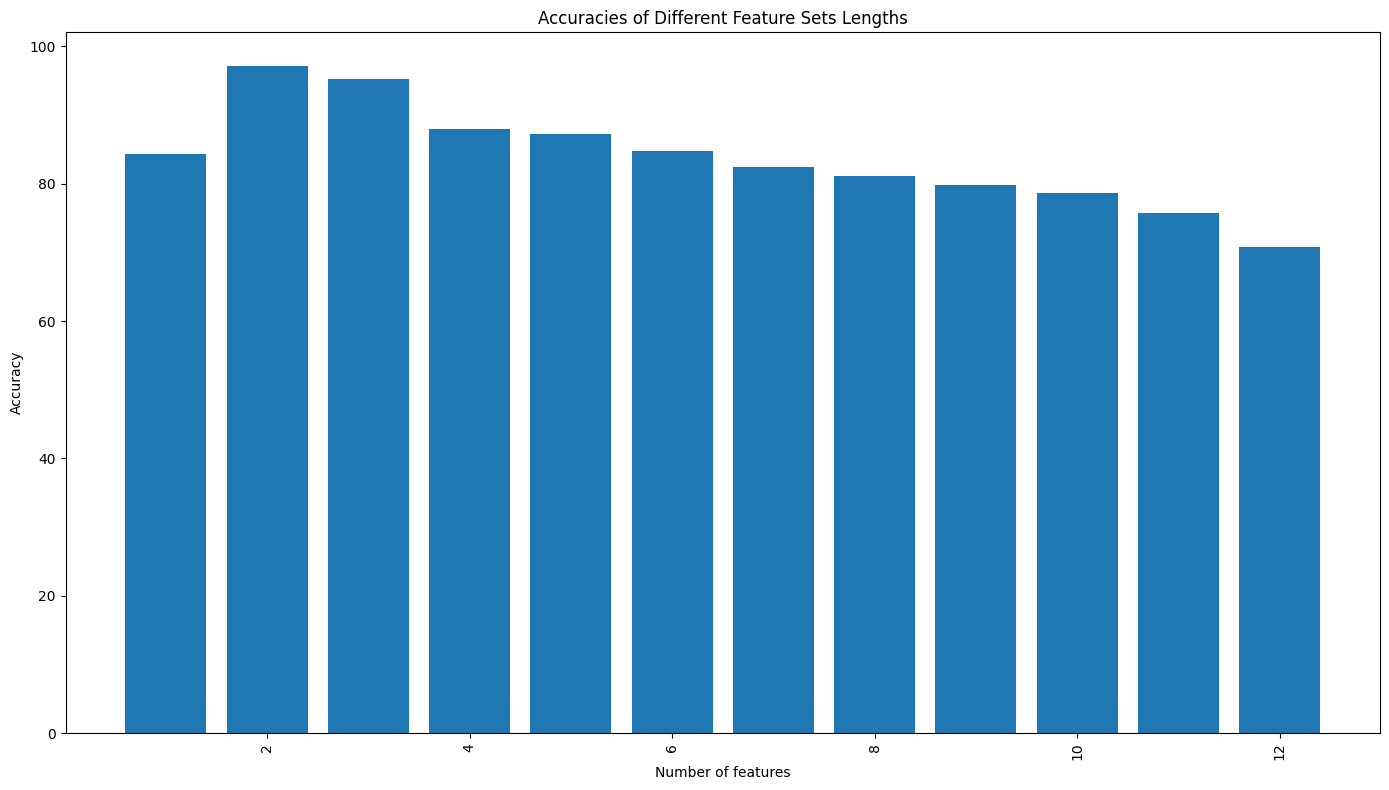

In [89]:
plot_the_graph_with_feature_lengths(small_bw)

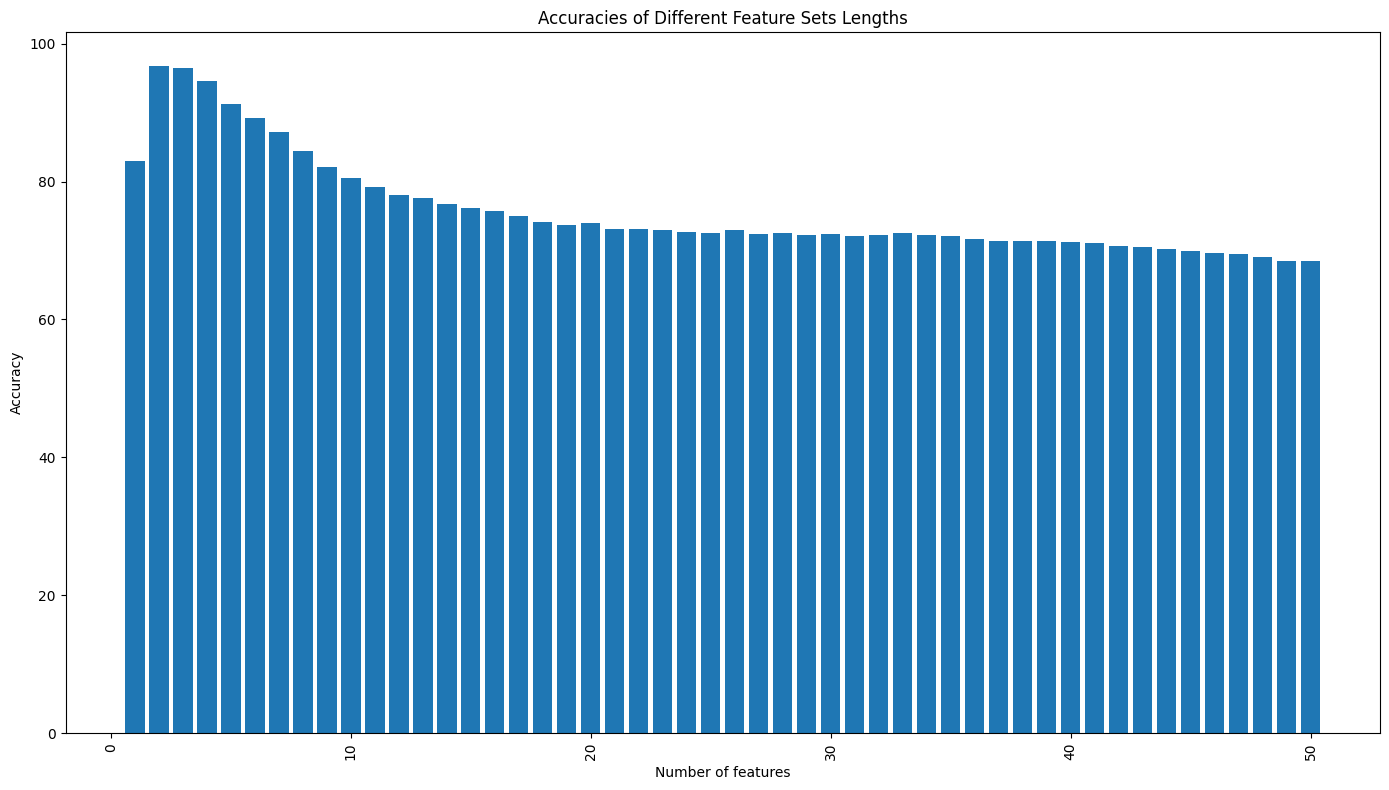

In [90]:
plot_the_graph_with_feature_lengths(large_fs)

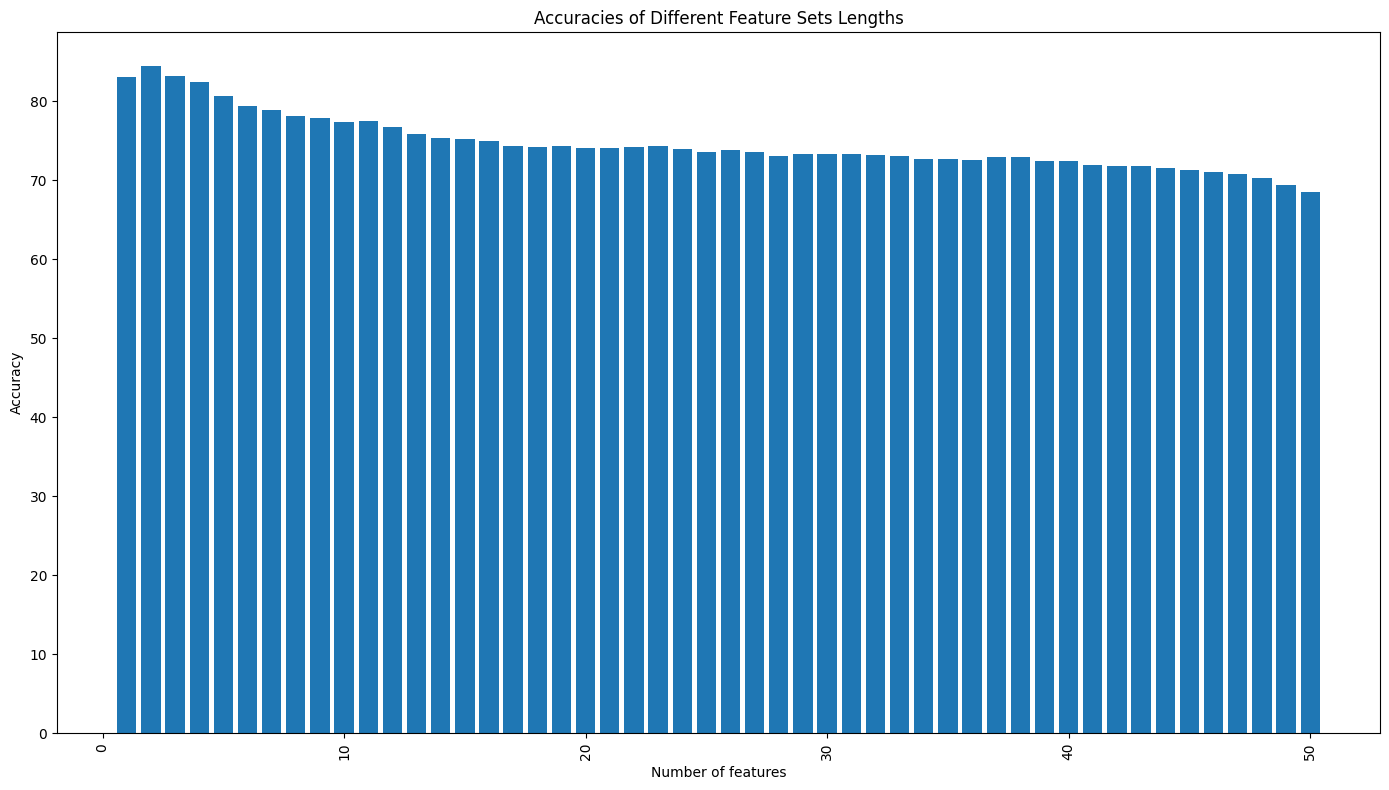

In [91]:
plot_the_graph_with_feature_lengths(large_bw)

In [93]:
def plot_the_graph_with_feature_lengths_inverted_x_axis(data):
    data_pandas = pd.DataFrame(data)
    data_pandas['features'] = data_pandas['features'].apply(len)
    plt.figure(figsize=(14, 8))
    plt.bar(data_pandas['features'], data_pandas['accuracy'])
    plt.gca().invert_xaxis()
    plt.xlabel('Number of features')
    plt.ylabel('Accuracy')
    plt.title('Accuracies of Different Feature Sets Lengths')
    plt.xticks(rotation=90)  # Rotate feature set labels for better readability
    plt.tight_layout()
    plt.show()

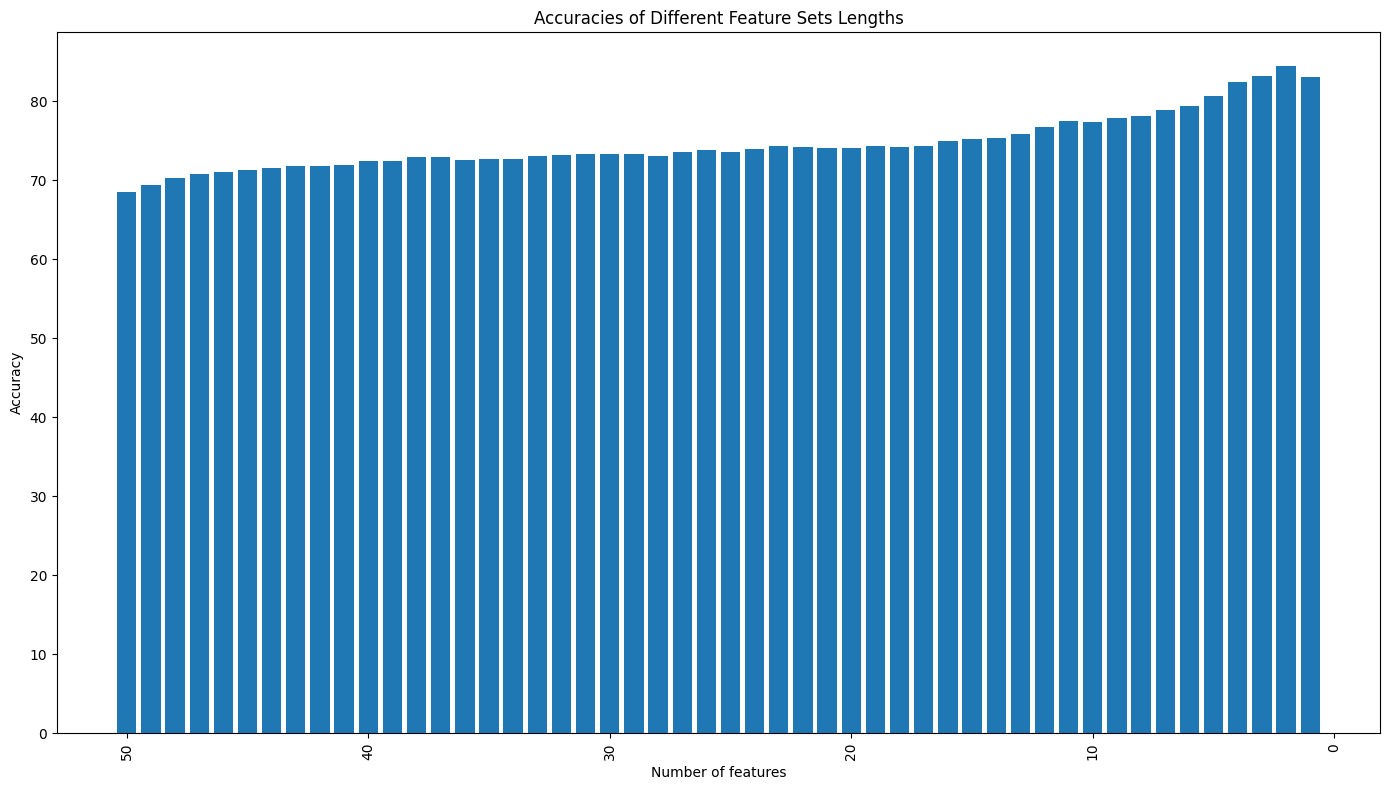

In [95]:
plot_the_graph_with_feature_lengths_inverted_x_axis(large_bw)